In [2]:
import pandas as pd
import PortfolioAnalyser as pa
import cufflinks as cf

In [3]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2000, 1, 1)
FED = web.DataReader('WALCL', 'fred', start)
gold = web.DataReader('GOLDPMGBD228NLBM', 'fred', start)

In [4]:
FED.columns = ['FED']
gold.columns = ['Gold']

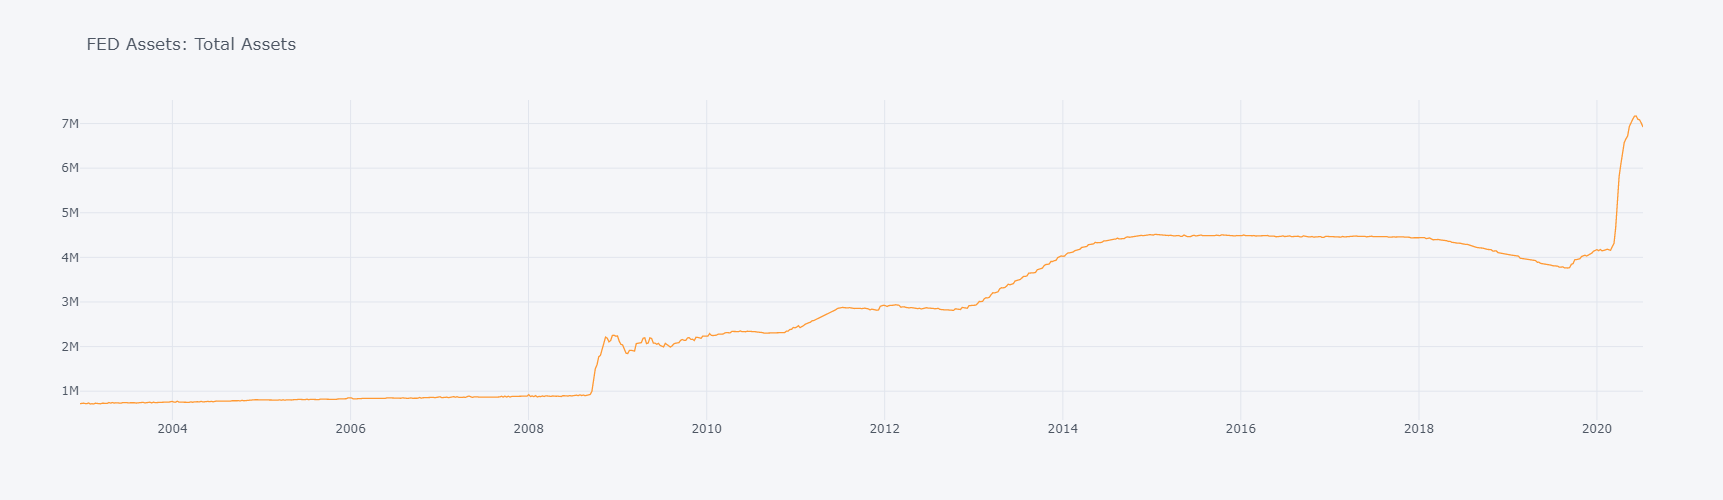

In [5]:
FED.iplot(dimensions=pa.dimensions, title='FED Assets: Total Assets')

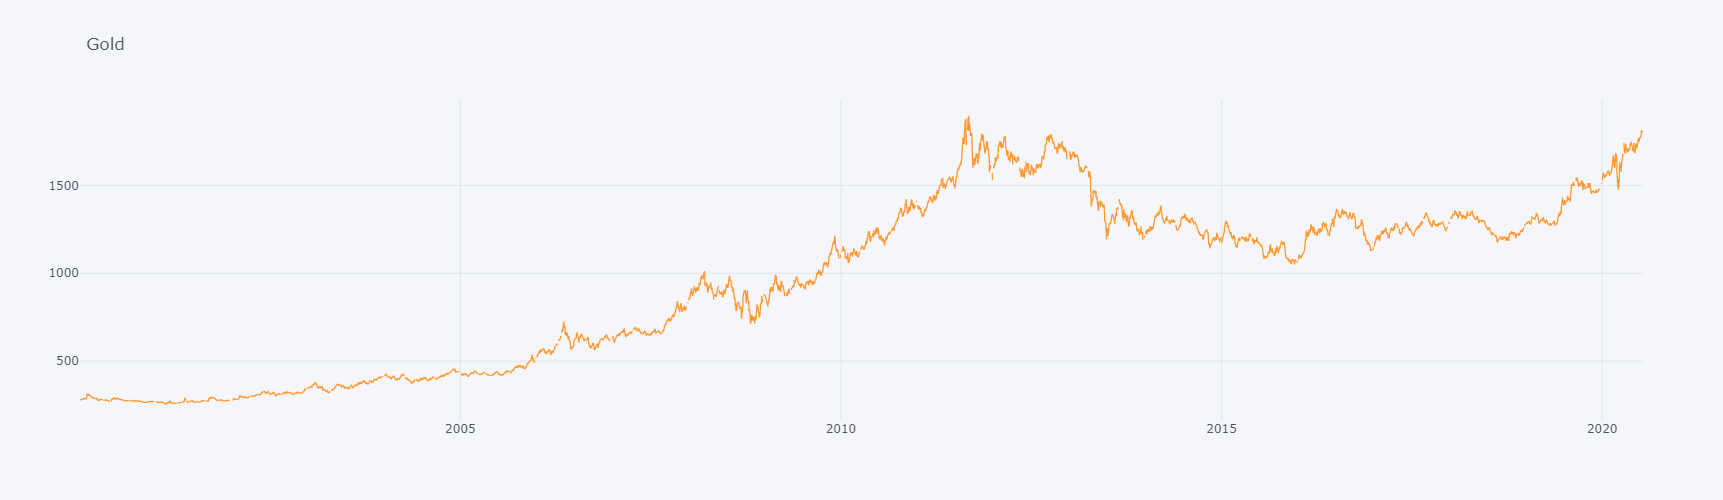

In [6]:
gold.iplot(dimensions=pa.dimensions, title='Gold')

In [7]:
data = pa.merge_time_series(FED, gold, how='inner').ffill()
data

,FED,Gold
DATE,,
2002-12-18,"719,542.00",338.00
2002-12-25,"732,059.00",338.00
2003-01-01,"730,994.00",338.00
2003-01-08,"723,762.00",349.75
2003-01-15,"720,074.00",351.00
...,...,...
2020-06-10,"7,168,936.00","1,722.05"
2020-06-17,"7,094,690.00","1,724.35"
2020-06-24,"7,082,302.00","1,766.05"


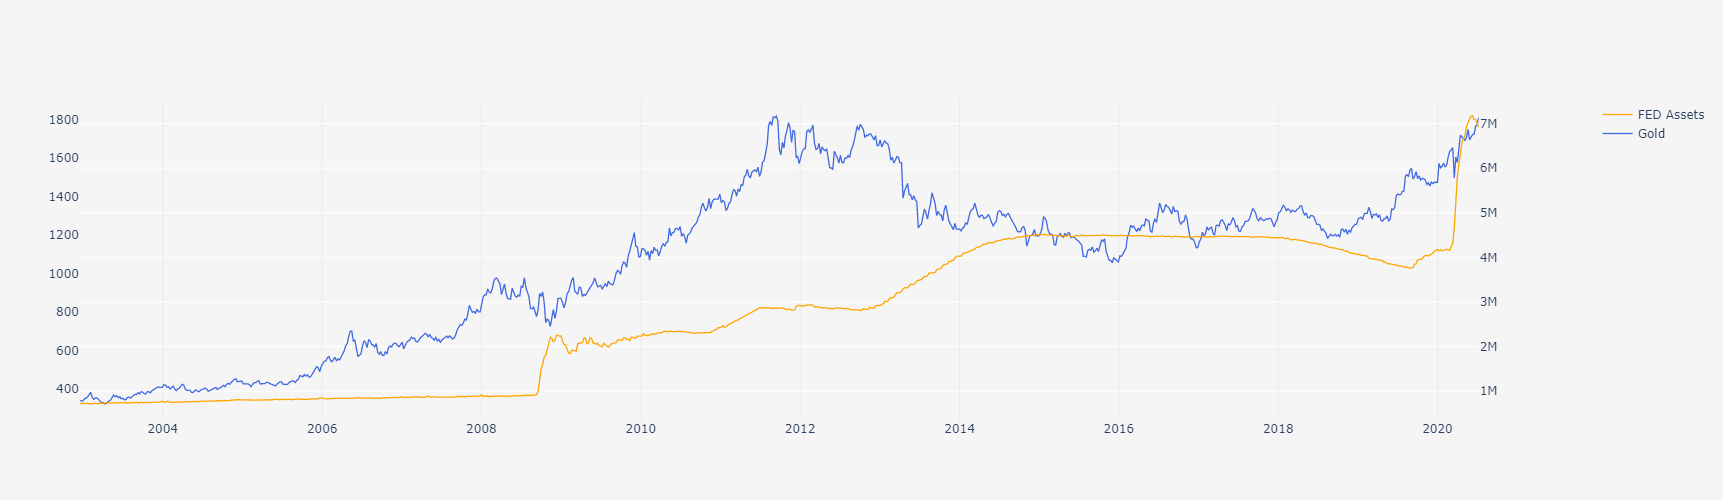

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=data.index, y=data['FED'], name="FED Assets", line=dict(color = 'orange', width = 1.3)),
    secondary_y=True,
)


fig.add_trace(
    go.Scatter(x=data.index, y=data['Gold'], name="Gold", line=dict(color = 'royalblue', width = 1.3)),
    secondary_y=False,
)

# Add figure title
fig.update_layout(
    title_text="",
    width=990,
    height=500,
    plot_bgcolor='#f5f5f5',
    paper_bgcolor='#f5f5f5',
    xaxis=dict(
        title='',
        showgrid=True,
        gridcolor='#ebebeb',
        titlefont=dict(size=12),
    ),    
    yaxis=dict(
        title='',
        showgrid=False,
        gridcolor='#ebebeb',
        zeroline=True, # Adicionar ou não a zero line
        zerolinecolor='#d2d2d2',

    )
)

# Set y-axes titles
fig.update_yaxes(title_text="", secondary_y=False)
fig.update_yaxes(title_text="", secondary_y=True)

fig.show()

In [14]:
pa.print_title('Data')
data

**Data**

,FED,Gold
DATE,,
2002-12-18,"719,542.00",338.00
2002-12-25,"732,059.00",338.00
2003-01-01,"730,994.00",338.00
2003-01-08,"723,762.00",349.75
2003-01-15,"720,074.00",351.00
...,...,...
2020-06-10,"7,168,936.00","1,722.05"
2020-06-17,"7,094,690.00","1,724.35"
2020-06-24,"7,082,302.00","1,766.05"


In [19]:
returns = data.pct_change().dropna()
pa.print_title('Returns in percentage')
returns * 100

**Returns in percentage**

,FED,Gold
DATE,,
2002-12-25,1.74,0.00
2003-01-01,-0.15,0.00
2003-01-08,-0.99,3.48
2003-01-15,-0.51,0.36
2003-01-22,2.21,2.14
...,...,...
2020-06-10,0.05,0.98
2020-06-17,-1.04,0.13
2020-06-24,-0.17,2.42


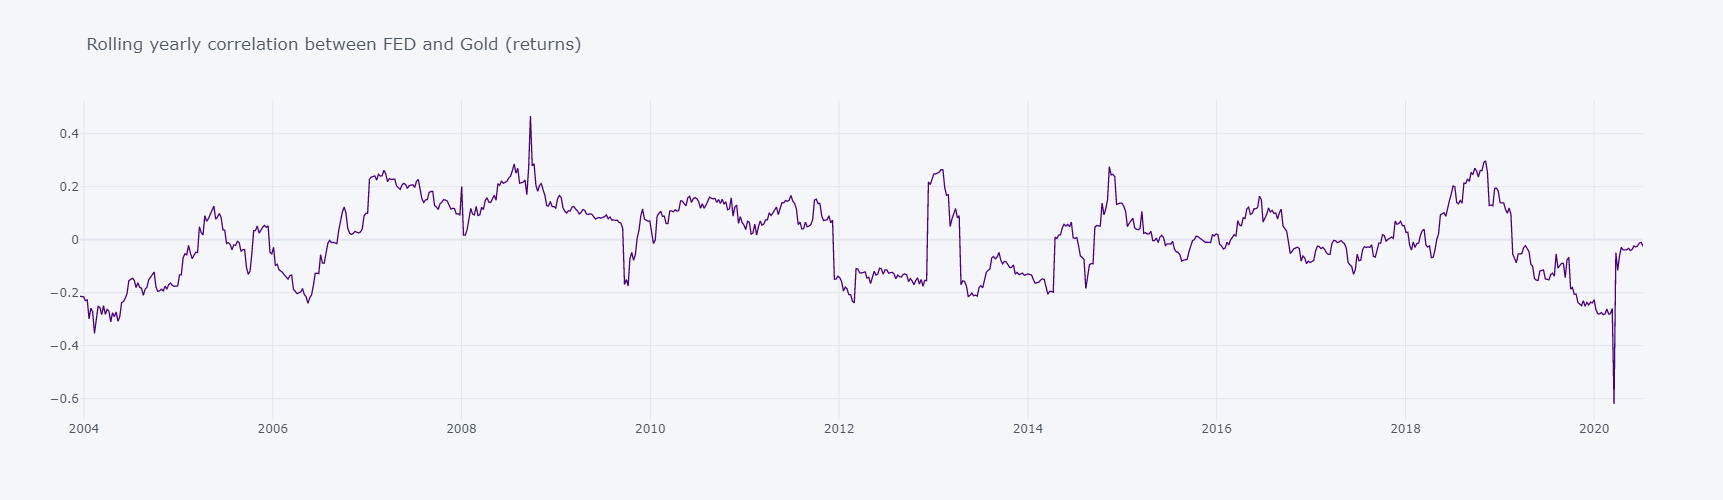

In [17]:
returns['FED'].rolling(52).corr(returns['Gold']).dropna().iplot(dimensions=pa.dimensions, color='indigo', title='Rolling yearly correlation between FED and Gold (returns)')

In [18]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Código ON/OFF</button>''', raw=True)

Código ON/OFF